In [1]:
import sympy as sym
t=sym.Symbol('t')
x = sym.Function('x')(t)
y = x**2
V = 9.8*y
T = ((sym.diff(x,t)**2+sym.diff(y,t)**2)/2)
L = T-V
L

2*x(t)**2*Derivative(x(t), t)**2 - 9.8*x(t)**2 + Derivative(x(t), t)**2/2

In [2]:
eq = sym.diff(L, x)-sym.diff(L, x.diff(t),t)
eq

-4*x(t)**2*Derivative(x(t), t, t) - 4*x(t)*Derivative(x(t), t)**2 - 19.6*x(t) - Derivative(x(t), t, t)

In [3]:
def dummify_undefined_functions(expr): 
    mapping = {} # replace all Derivative terms 
    for der in expr.atoms(sym.Derivative): 
        f_name = der.expr.func.__name__ 
        var_names = [var.name for var in der.variables] 
        name = "d%s_d%s" % (f_name, 'd'.join(var_names)) 
        mapping[der] = sym.Symbol(name) 
        # replace undefined functions 
        from sympy.core.function import AppliedUndef 
        for f in expr.atoms(AppliedUndef): 
            f_name = f.func.__name__ 
            mapping[f] = sym.Symbol(f_name) 
    return expr.subs(mapping)

In [4]:
eqdummy = dummify_undefined_functions(eq)
eqdummy

-4*dx_dt**2*x - 4*dx_dtdt*x**2 - dx_dtdt - 19.6*x

In [5]:
x, dx_dt, dx_dtdt=sym.symbols("x, dx_dt, dx_dtdt")
sol = sym.solve(eqdummy, dx_dtdt)
sol[0]

-2.0*x*(10.0*dx_dt**2 + 49.0)/(20.0*x**2 + 5.0)

In [6]:
eqlambda = sym.lambdify((x, dx_dt), sol[0],"numpy")
eqlambda

<function numpy.<lambda>>

In [7]:
import numpy as np
from numpy import sqrt, linspace, sin, cos 
from scipy.integrate import odeint
from pylab import plot, axis, show

In [8]:
def odefun(z, t):
    x = z[0]
    v = z[1]
    return [v, eqlambda(x,v)]

In [9]:
dt = 0.05
times = np.arange(0.0, 20, dt)
res=odeint(odefun,[-1,0],times)

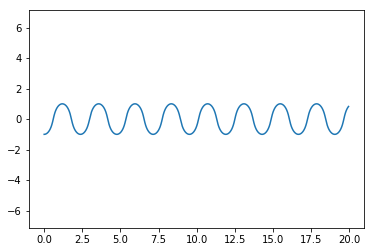

In [10]:
plot(times, res[:,0]) 
axis('equal') 
show()

In [11]:
parabxs=np.arange(-1,1,.001)

In [12]:
parabys=[x**2 for x in parabxs]

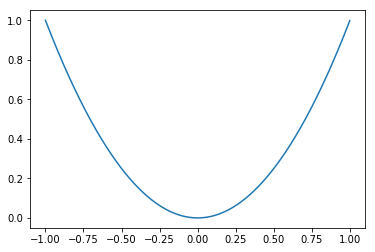

In [13]:
plot(parabxs, parabys, )
show()

In [14]:
odelist = [odeint(odefun,[i,0],times) for i in np.arange(-1,-.1,.1)]

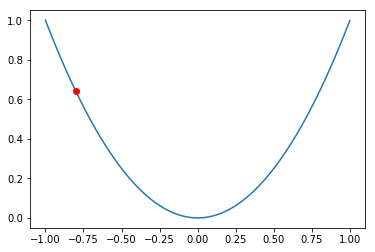

In [15]:
plot(parabxs, parabys, odelist[2][0,0], odelist[2][0,0]**2,'ro')
show()

In [16]:
(odelist[1][0,0], odelist[1][0,0]**2)

(-0.90000000000000002, 0.81000000000000005)

In [17]:
odelist[0][:,1]

array([ 0.        ,  0.19670784,  0.39774775,  0.6078989 ,  0.83293573,
        1.08041476,  1.36092602,  1.69019165,  2.09253502,  2.605277  ,
        3.27290441,  4.04842042,  4.42225642,  3.90585226,  3.13241371,
        2.49666731,  2.00854861,  1.62258778,  1.30418372,  1.03099727,
        0.78850502,  0.56682534,  0.35882013,  0.15895604, -0.0374231 ,
       -0.23461615, -0.43700443, -0.64950974, -0.87817554, -1.13102139,
       -1.41942041, -1.76041918, -2.18050274, -2.71966242, -3.41869876,
       -4.17790724, -4.38348754, -3.75630733, -2.99792103, -2.3934993 ,
       -1.92824038, -1.55741004, -1.24906748, -0.98268556, -0.74482524,
       -0.52624567, -0.32018672, -0.12133014,  0.0748758 ,  0.2727125 ,
        0.47662692,  0.69170423,  0.92428745,  1.18290812,  1.47980524,
        1.83348743,  2.27277735,  2.84011245,  3.56850989,  4.28718567,
        4.30940129,  3.60455692,  2.86970654,  2.29541755,  1.85132702,
        1.49447586,  1.19546001,  0.93540109,  0.70184078,  0.48

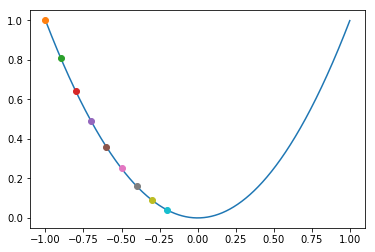

In [18]:
plot(parabxs, parabys)
l = len(odelist)
[plot(odelist[i][0,0], odelist[i][0,0]**2, "o") for i in range(len(odelist))]
show()

In [19]:
len(odelist)

9

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


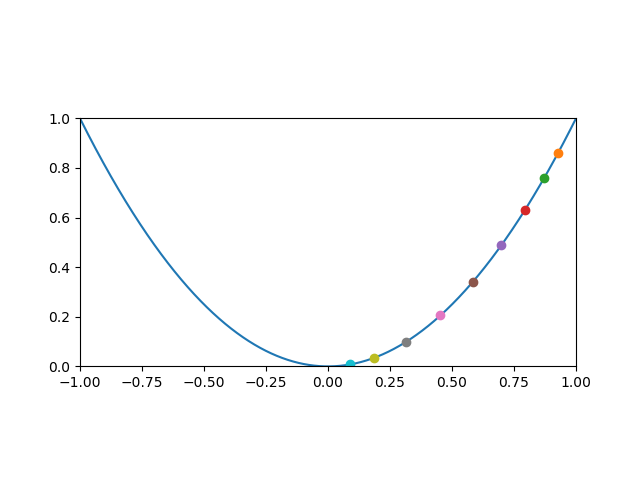

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(0, 1))
ax.set_aspect('equal')
lines = [ax.plot([],[])[0]]
lines.extend([ax.plot([],[],'o')[0] for _ in range(len(odelist))])
def init():
    for line in lines:
        line.set_data([], []) 
    return lines
def frame(i):
    for j, line in enumerate(lines):
        if (j==0):
            line.set_data(parabxs,parabys)
        else:
            line.set_data(odelist[j-1][i,0], odelist[j-1][i,0]**2)
    return lines

anim = animation.FuncAnimation(fig, frame, init_func=init, frames=len(times), interval=200, blit=True)
anim.save('parabolicbowl.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
#plt.show()